# **HR Analytics - Predict Employee Attrition**

In [1]:
#  Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


!pip uninstall scikit-learn -y
!pip uninstall imbalanced-learn -y
!pip uninstall shap -y
!pip uninstall mlxtend -y
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.0 shap==0.41.0 mlxtend==0.22.0 numpy==1.24.3


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.10.0
Uninstalling imbalanced-learn-0.10.0:
  Successfully uninstalled imbalanced-learn-0.10.0
Found existing installation: shap 0.41.0
Uninstalling shap-0.41.0:
  Successfully uninstalled shap-0.41.0
Found existing installation: mlxtend 0.22.0
Uninstalling mlxtend-0.22.0:
  Successfully uninstalled mlxtend-0.22.0
  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.10.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached shap-0.41.0-cp311-cp311-linux_x86_64.whl
  Using cached mlxtend-0.22.0-py2.py3-none-any.whl.metadata (1.6 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
Using cached imbalanced_learn-0.10.0-py3-none-any.whl (225 kB)
Using cached mlxtend-0.22.0-py2.py3-no

In [2]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")  # dataset path

## **Checking missing values**

In [4]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [5]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1465,False
1466,False
1467,False
1468,False


## **Value Counts**

In [6]:
print(df['Attrition'].value_counts())
print(df['Department'].value_counts())
print(df['JobRole'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


In [7]:
df.drop_duplicates(keep="first")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [8]:
df.groupby("JobRole")["StandardHours"].mean().sort_values(ascending=False)

,StandardHours
JobRole,
Healthcare Representative,80.0
Human Resources,80.0
Laboratory Technician,80.0
Manager,80.0
Manufacturing Director,80.0
Research Director,80.0
Research Scientist,80.0
Sales Executive,80.0
Sales Representative,80.0


##**Attrition Count Plot**

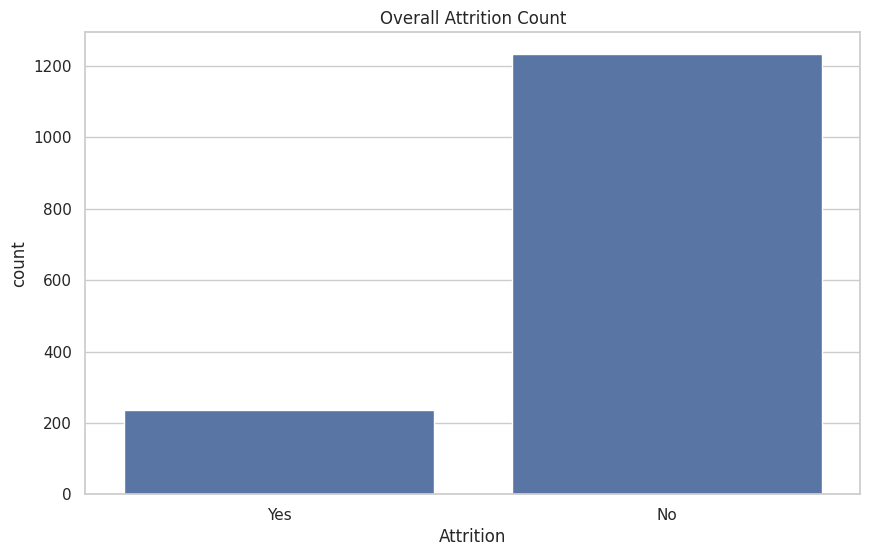

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Attrition')
plt.title("Overall Attrition Count")
plt.show()


## Attrition_Rate for each Job_Role
**Highest Attrition Count**:
Laboratory Technician and Sales Executive have the highest counts of employees who left (blue bars).
These roles likely need attention for employee retention.

**Lowest Attrition Count**:
Research Director and Manager roles have the lowest attrition counts.
These positions show relatively stable retention.

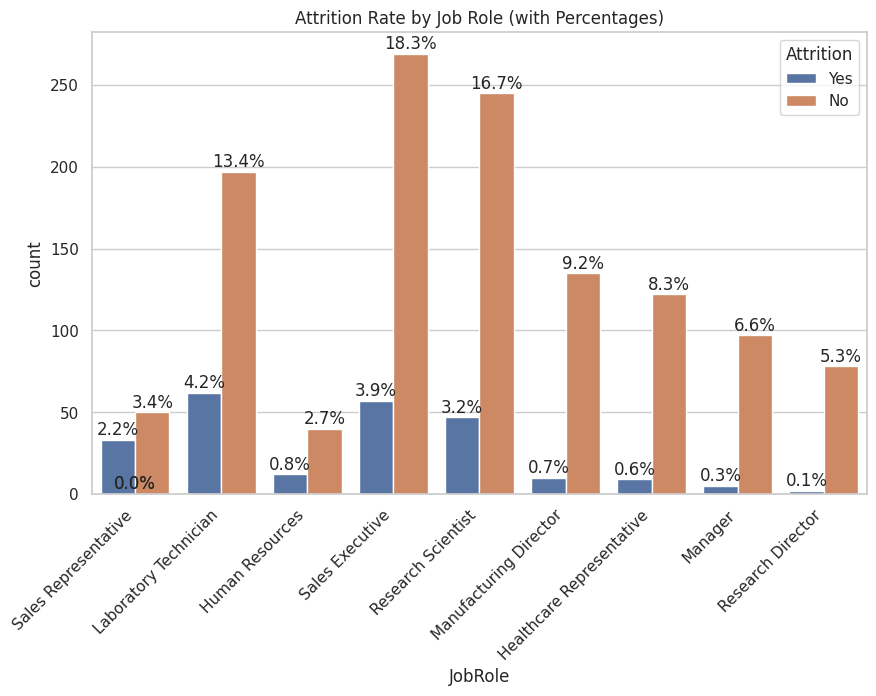

In [10]:

# Calculating attrition rate for each job role
attrition_rate = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()
attrition_rate['Yes'] = attrition_rate['Yes'] * 100  # Convert to percentage
sorted_roles = attrition_rate['Yes'].sort_values(ascending=False).index

ax =sns.countplot(data=df, x='JobRole', hue='Attrition', order=sorted_roles)
plt.title("Attrition Rate by Job Role (with Percentages)")
plt.xticks(rotation=45, ha='right')


# Add percentages to bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            f'{height / len(df) * 100:.1f}%', ha='center')

plt.show()

## **Attrition by Department**
This chart helps us quickly see which departments are losing the most people. It gives HR a heads-up on where things might not be going well—like heavy workloads, lack of support, or team issues—so they can take action before more employees leave.

* **R\&D** has the highest attrition count due to its large size but retains many employees — needs scaled retention efforts.
* **Sales** shows a high attrition **rate**, indicating possible job dissatisfaction or stress — requires focused retention strategies.
* **HR** has the lowest attrition — reflects good job stability and employee satisfaction.


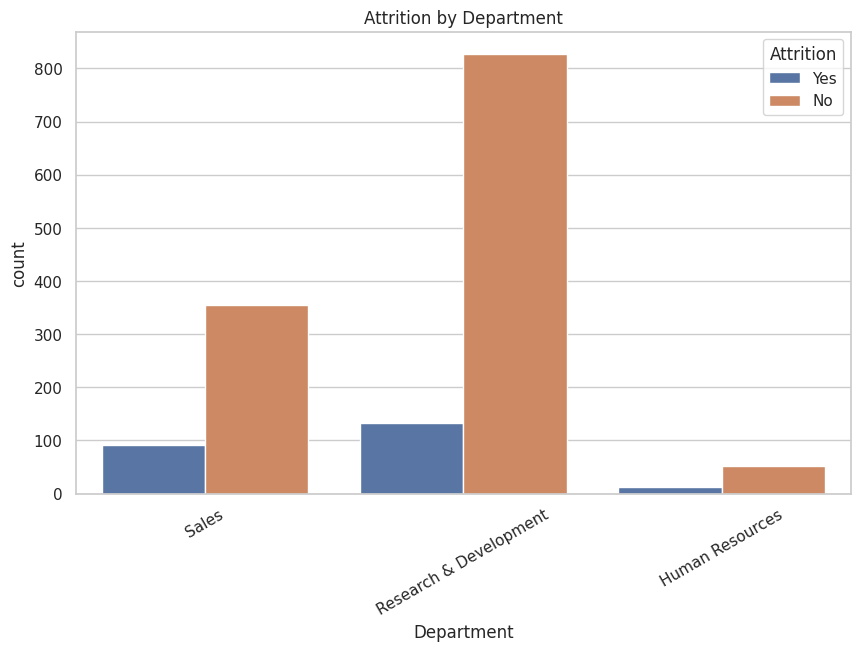

In [11]:
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=30)
plt.show()


##**Attrition by Salary Band**
This chart gives a clear picture of whether employees with lower salaries are more likely to quit their jobs. It helps HR teams spot if pay is a key reason people are leaving, so they can make smarter decisions about salary and retention.

Attrition is highest in the low salary band, suggesting pay dissatisfaction.

Attrition decreases as salary increases, indicating a strong link between compensation and employee retention.


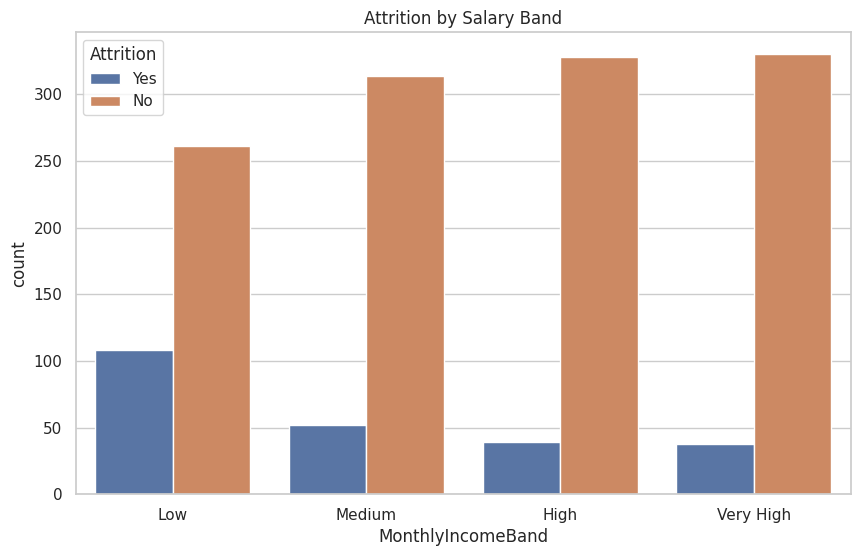

In [12]:
df['MonthlyIncomeBand'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.countplot(data=df, x='MonthlyIncomeBand', hue='Attrition')
plt.title("Attrition by Salary Band")
plt.show()


## **Attrition vs Age**
Helps identify whether younger or older employees are more likely to quit.
For example, if younger employees are leaving more, HR may need to improve career growth opportunities.

* **Younger employees (\~32 years)** are more likely to leave.
* **Older employees (\~36+ years)** tend to stay longer.
* **Attrition is rare among senior employees**, suggesting age is inversely related to attrition.


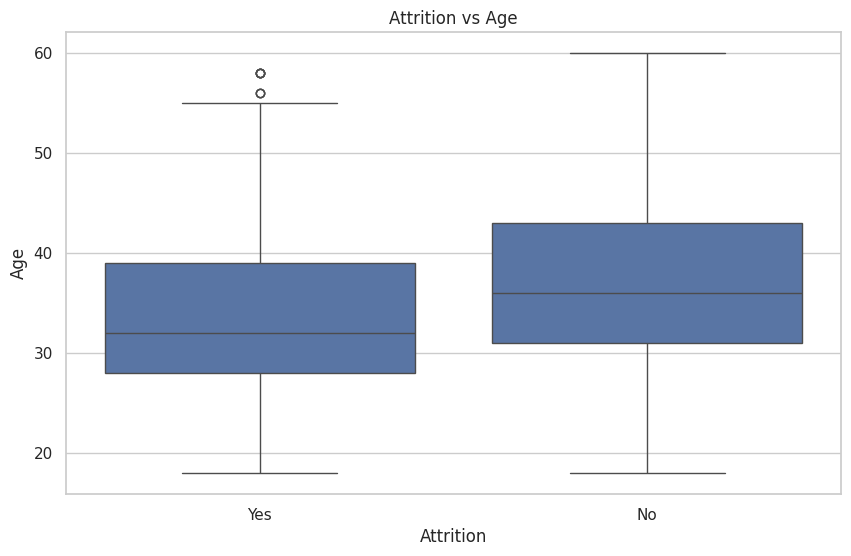

In [13]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Attrition vs Age")
plt.show()



## **Attrition by Gender**
check if one gender is leaving more often, which may point to workplace culture or fairness issues.
Higher Male Attrition in Count: More males have left the organization than females in absolute numbers.

Proportionally Similar: While counts are higher for males, this could reflect a larger male workforce rather than a higher attrition rate.

Gender Not a Strong Predictor Alone: No significant imbalance in attrition across genders suggests gender alone may not be a strong factor in predicting attrition without adjusting for workforce size.

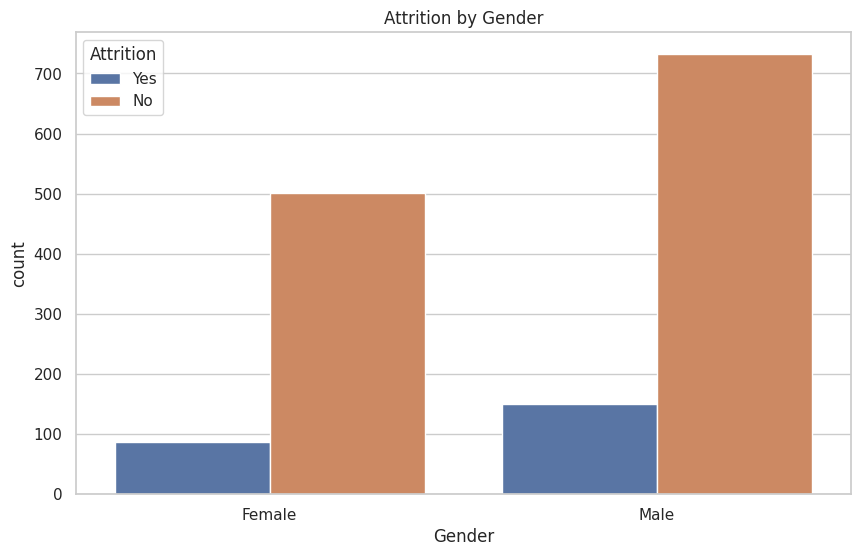

In [14]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title("Attrition by Gender")
plt.show()

## **Attrition by Promotion History**
This chart gives us a window into how promotions affect employee decisions to stay or leave. If a lot of people who haven’t been promoted in 4 or 5 years are quitting, it sends a clear message: they might feel stuck or overlooked.

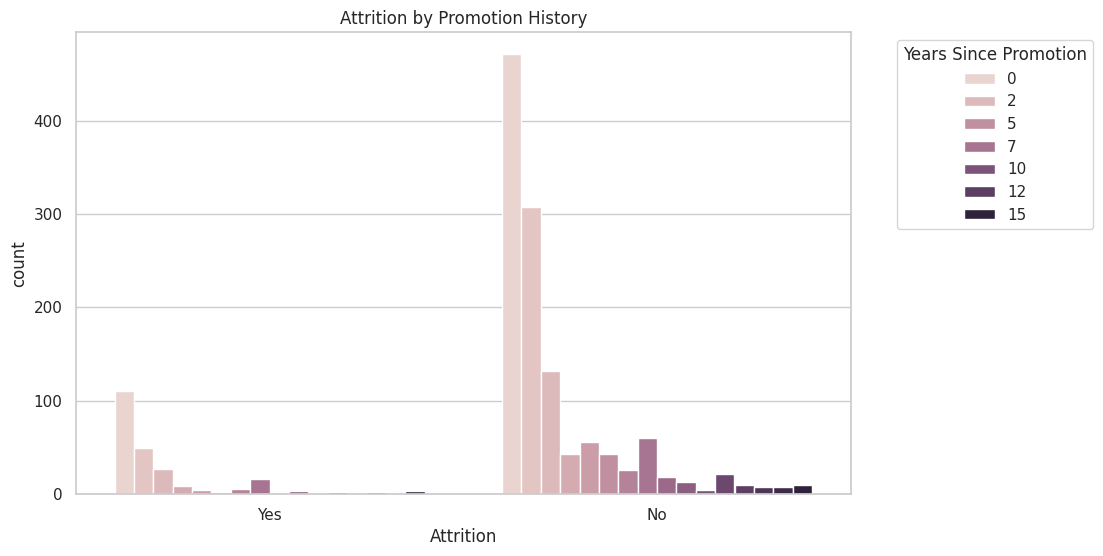

In [15]:

sns.countplot(x='Attrition', hue='YearsSinceLastPromotion', data=df)
plt.title("Attrition by Promotion History")
plt.legend(title="Years Since Promotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **Heatmap for Correlation**
This code looks at all the numeric columns in your dataset and calculates how strongly each one is related to the others using correlation values (from -1 to +1).

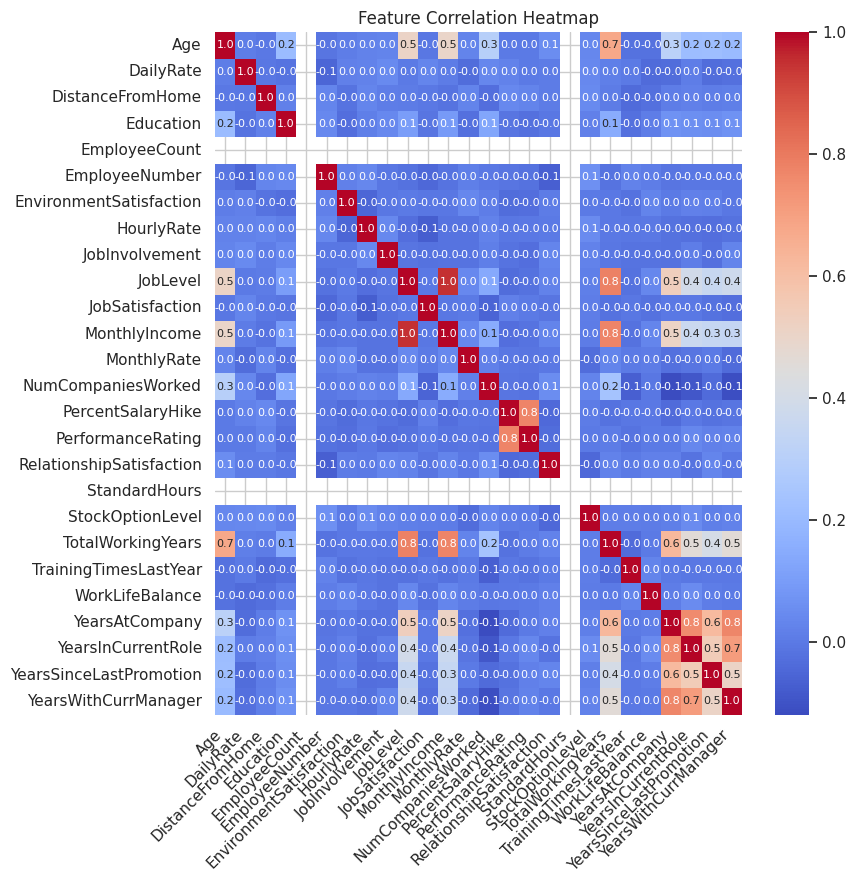

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the figure size
plt.figure(figsize=(9, 9))

# Calculate the correlation matrix
corr = df.select_dtypes(include='number').corr()

# Create the heatmap with adjustments
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f',
            annot_kws={"size": 8})  # Adjust font size here

plt.title("Feature Correlation Heatmap")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


## **Pie-chart distribution**
It tells you what slice of your employees are leaving the company. If that slice is getting too big, it's a sign that something might be off—maybe people aren’t happy, or they’re finding better opportunities elsewhere.

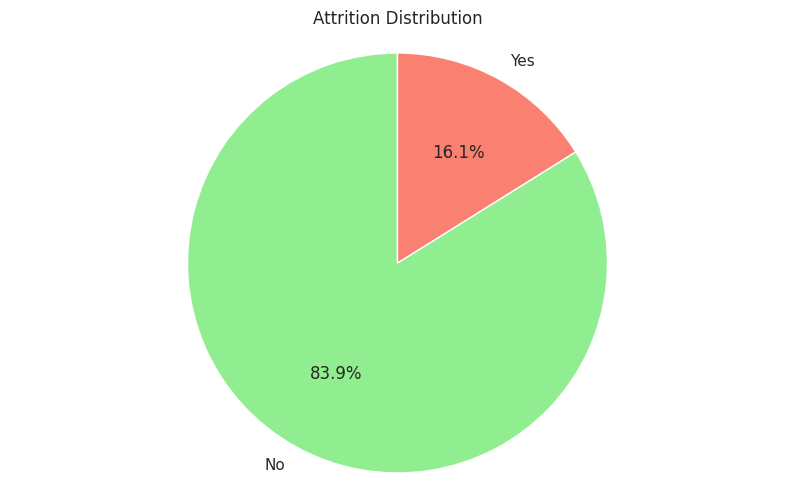

In [17]:
attrition_counts = df['Attrition'].value_counts()
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title("Attrition Distribution")
plt.axis('equal')
plt.show()

## **Attrition by Martial Status**

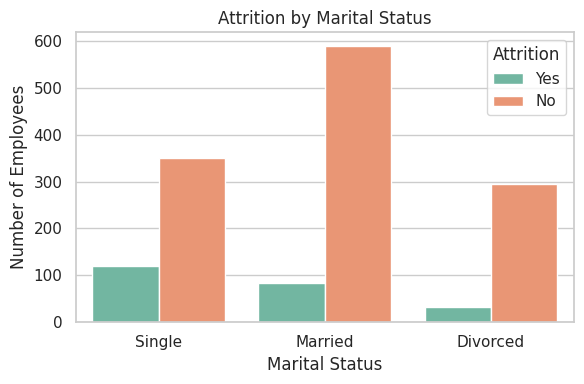

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='Set2')
plt.title('Attrition by Marital Status')
plt.ylabel('Number of Employees')
plt.xlabel('Marital Status')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

## **Model accuracy report + confusion matrix.**
"This loads and encodes HR data, balances attrition classes using SMOTE, scales the features, trains a Random Forest model, and evaluates it with a classification report showing precision, recall, and F1-score and confusion matrix is a table that helps us to understand how well our classification model is performing."

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       247
           1       0.41      0.34      0.37        47

    accuracy                           0.82       294
   macro avg       0.64      0.62      0.63       294
weighted avg       0.80      0.82      0.81       294



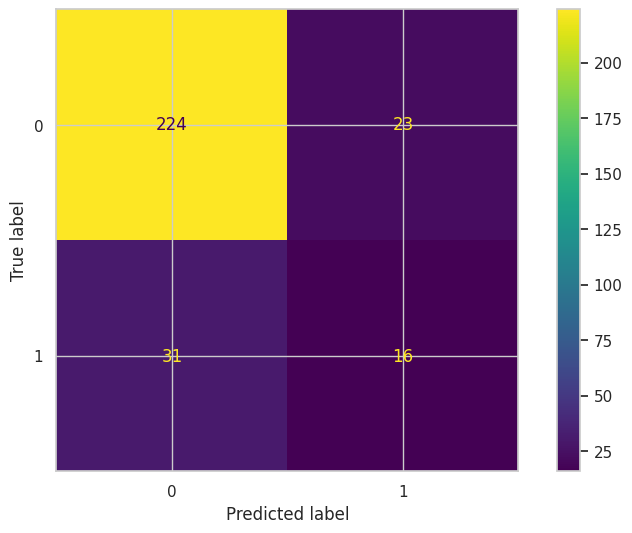

In [19]:


#  Import Libraries

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  Load Dataset

df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Encode Categorical Variables

df_encoded = df.copy()
le = LabelEncoder()

# Encode all object type columns
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


#  Define Features and Target

X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]  # Assuming 'Attrition' is the target


#  Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#  Apply SMOTE to Balance Data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


#  Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


#  Now you can train your model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train_resampled)

y_pred = clf.predict(X_test_scaled)
# Print evaluation metrics
print(classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


In [23]:
import numpy as np


if not hasattr(np, 'bool'):
    np.bool = bool


In the future `np.bool` will be defined as the corresponding NumPy scalar.


## **Explain the Model with SHAP**
It indicates that StockOptionLevel, JobSatisfaction, and Education are the top 3 most influential features in the  model’s decisions.


Detected multi-class or binary classification.
Available classes: 2


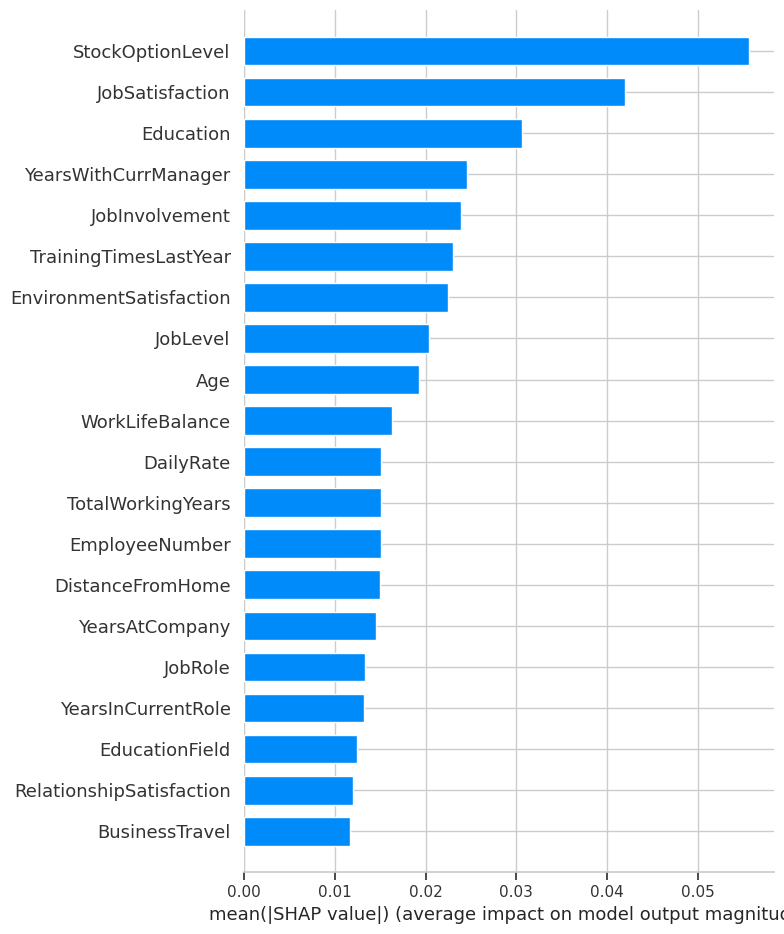

In [26]:

import numpy as np
if not hasattr(np, 'bool'):
    np.bool = bool

import shap
import pandas as pd

# Ensuring X_test is a DataFrame with correct column names
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_train.columns)

shap.initjs()

# TreeExplainer for tree-based models
explainer = shap.TreeExplainer(clf)

# Computing SHAP values
shap_values = explainer.shap_values(X_test)


if isinstance(shap_values, list):
    print("Detected multi-class or binary classification.")
    print("Available classes:", len(shap_values))
    shap_values = shap_values[0]

# SHAP plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


## **Attrition Risk_Score**

In [27]:
df_test = df.iloc[X_test.index].copy()  # Create an explicit copy
df_test['Attrition_Risk_Score'] = clf.predict_proba(X_test_scaled)[:, 1] * 100

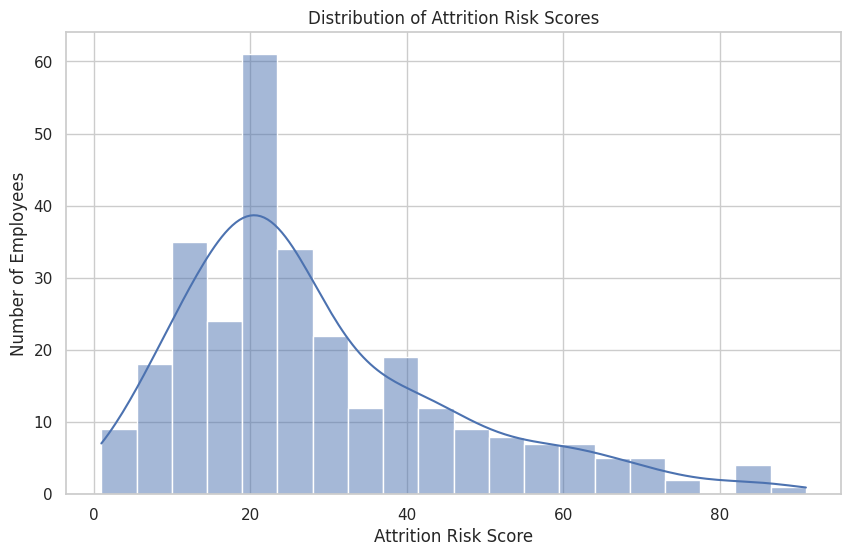

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Use df_test instead of df to access 'Attrition_Risk_Score'
sns.histplot(df_test['Attrition_Risk_Score'], bins=20, kde=True)
plt.title('Distribution of Attrition Risk Scores')
plt.xlabel('Attrition Risk Score')
plt.ylabel('Number of Employees')
plt.show()